In [56]:
print("hello world")

hello world


In [57]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [58]:
df = pd.read_csv("/Users/hj/Documents/무제/심화 프로젝트/train.csv", sep=',')
df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0


In [59]:
trade = pd.read_csv("/Users/hj/Documents/무제/심화 프로젝트/international_trade.csv", sep=',')
trade

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38
...,...,...,...,...,...,...,...
1269,2023-02,포포(papaw)[파파야(papaya)],0,0,23830,71,-71
1270,2023-02,사과,135165,351,0,0,351
1271,2023-02,배,2206012,5411,1,0,5411
1272,2023-02,신 체리[프루너스 체라서스(Prunus cerasus)],5,0,0,0,0


In [60]:
test_df = pd.read_csv("/Users/hj/Documents/무제/심화 프로젝트/test.csv", sep=',')
test_df

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J
...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,RD,F,J
1088,RD_F_J_20230328,2023-03-28,RD,F,J
1089,RD_F_J_20230329,2023-03-29,RD,F,J
1090,RD_F_J_20230330,2023-03-30,RD,F,J


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [62]:
df.describe()

,supply(kg),price(원/kg)
count,5.939700e+04,59397.000000
mean,1.189453e+04,1131.680674
std,5.226400e+04,2029.941445
min,0.000000e+00,0.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,3.800000e+03,1519.000000
max,1.222800e+06,20909.000000


In [63]:
df.groupby('item')['price(원/kg)'].describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
BC,13707.0,910.196615,1422.148301,0.0,0.00,0.0,2032.50,8750.0
CB,7615.0,152.187131,345.053036,0.0,0.00,0.0,0.00,2500.0
CR,10661.0,273.118938,632.929933,0.0,0.00,0.0,0.00,3882.0
RD,12184.0,187.073539,358.150266,0.0,0.00,0.0,383.00,5715.0
TG,15230.0,3177.442022,2805.240092,0.0,992.25,2273.5,5532.75,20909.0


In [64]:
df['item'].value_counts()

# 감귤 > 브로콜리 > 무 > 당근 > 양배추 

item
TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: count, dtype: int64

In [65]:
df['corporation'].value_counts()

corporation
A    13707
E    13707
D    12184
C     9138
B     7615
F     3046
Name: count, dtype: int64

In [66]:
df['location'].value_counts()

location
J    35029
S    24368
Name: count, dtype: int64

In [67]:
df_cnt = df.groupby('item')['supply(kg)'].agg(['count', 'sum'])
df_cnt

,count,sum
item,,
BC,13707,1.370782e+07
CB,7615,8.560427e+07
CR,10661,5.388242e+07
RD,12184,3.371415e+08
TG,15230,2.161631e+08


In [68]:
type(df['timestamp'][0])

str

In [69]:
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])

In [70]:
type(df['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           59397 non-null  object        
 1   timestamp    59397 non-null  datetime64[ns]
 2   item         59397 non-null  object        
 3   corporation  59397 non-null  object        
 4   location     59397 non-null  object        
 5   supply(kg)   59397 non-null  float64       
 6   price(원/kg)  59397 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 3.2+ MB


In [72]:
# timestamp : year / month / day 쪼개기

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['dayofweek'] = df['timestamp'].dt.dayofweek  ## 무슨요일인지 확인 

test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = df['timestamp'].dt.month
test_df['day'] = df['timestamp'].dt.day
test_df['dayofweek'] = test_df['timestamp'].dt.dayofweek

df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,dayofweek
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28,1
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1,2
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2,3


In [73]:
dayofweek_price = df[['dayofweek', 'price(원/kg)']]

# 'dayofweek'로 그룹화하고 각 그룹의 평균을 계산
average_price_by_dayofweek = dayofweek_price.groupby('dayofweek')['price(원/kg)'].mean()

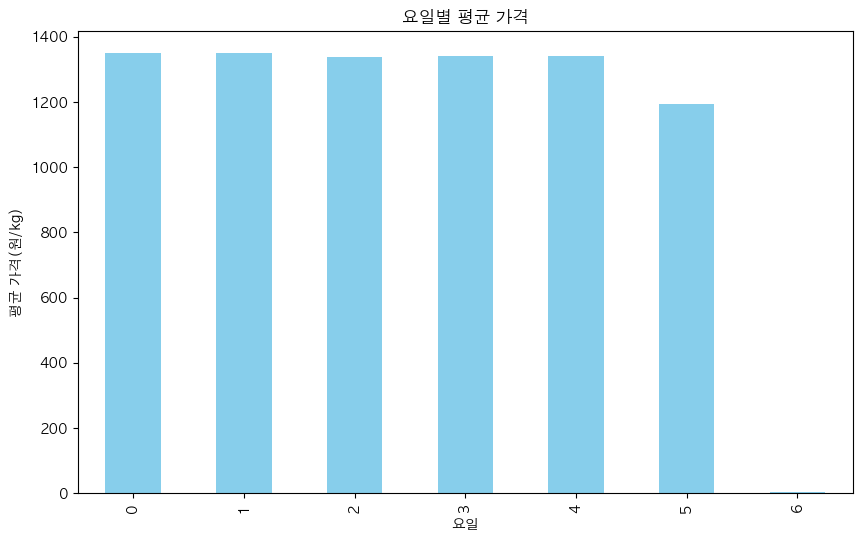

In [74]:
plt.figure(figsize=(10, 6))
average_price_by_dayofweek.plot(kind='bar', color='skyblue')
plt.title('요일별 평균 가격')
plt.xlabel('요일')
plt.ylabel('평균 가격(원/kg)')
plt.show()

In [75]:
df['price(원/kg)'].value_counts()

price(원/kg)
0.0       35455
500.0        50
1000.0       45
550.0        42
400.0        41
          ...  
6234.0        1
5686.0        1
5818.0        1
5652.0        1
655.0         1
Name: count, Length: 7094, dtype: int64

In [76]:
ttiti = df[(df['dayofweek']==6) & (df['price(원/kg)']==0)]
ttiti

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,dayofweek
5,TG_A_J_20190106,2019-01-06,TG,A,J,0.0,0.0,2019,1,6,6
12,TG_A_J_20190113,2019-01-13,TG,A,J,0.0,0.0,2019,1,13,6
19,TG_A_J_20190120,2019-01-20,TG,A,J,0.0,0.0,2019,1,20,6
26,TG_A_J_20190127,2019-01-27,TG,A,J,0.0,0.0,2019,1,27,6
33,TG_A_J_20190203,2019-02-03,TG,A,J,0.0,0.0,2019,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...
59363,RD_F_J_20230129,2023-01-29,RD,F,J,0.0,0.0,2023,1,29,6
59370,RD_F_J_20230205,2023-02-05,RD,F,J,0.0,0.0,2023,2,5,6
59377,RD_F_J_20230212,2023-02-12,RD,F,J,0.0,0.0,2023,2,12,6
59384,RD_F_J_20230219,2023-02-19,RD,F,J,0.0,0.0,2023,2,19,6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='item', ylabel='price(원/kg)'>

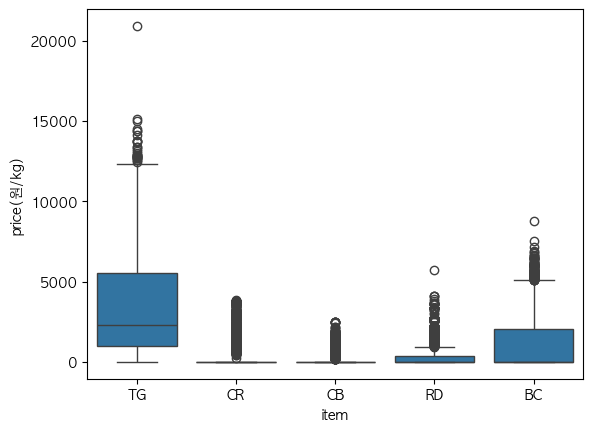

In [77]:
sns.boxplot(x='item', y='price(원/kg)', data=df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='item', ylabel='supply(kg)'>

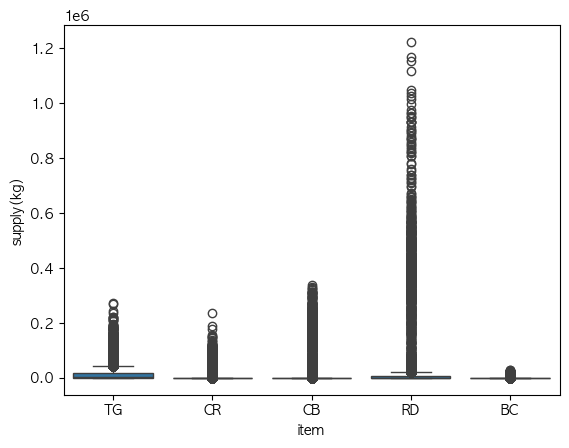

In [78]:
sns.boxplot(x='item', y='supply(kg)', data=df)

In [79]:
df[['supply(kg)','price(원/kg)']].corr()

,supply(kg),price(원/kg)
supply(kg),1.000000,-0.002297
price(원/kg),-0.002297,1.000000


In [80]:
type(df['supply(kg)'][0])

numpy.float64

In [81]:
type(df['price(원/kg)'][0])

numpy.float64

In [82]:
# 법인별 아이템 평균 가격
df_nonzero = df[df['price(원/kg)'] != 0]

df_nonzero.groupby(['corporation', 'item'])['price(원/kg)'].mean()

corporation  item
A            BC      2950.844624
             CB       837.157480
             CR      1822.305769
             RD       693.986832
             TG      4196.371403
B            BC      2467.550654
             CR      1268.293269
             TG      4141.467662
C            BC      2442.658784
             CR      1254.958580
             RD       371.000000
             TG      4727.268333
D            BC      2722.544228
             CB       582.931655
             CR      1296.441352
             RD       486.334215
             TG      3981.738238
E            BC      2852.381173
             CB       754.377660
             CR      1216.434698
             RD       543.048223
             TG      3629.237303
F            CB       673.926496
             RD       491.952677
Name: price(원/kg), dtype: float64

In [83]:
# rd_df = df[df['item'] == 'RD']
# rd_df

In [84]:
day_zero = df[df['supply(kg)'] == 0 ].groupby('dayofweek').size()
day_zero


dayofweek
0    4388
1    4435
2    4447
3    4468
4    4451
5    4821
6    8442
dtype: int64

In [85]:
df_nonzero = df[df['price(원/kg)'] != 0]
df_nonzero

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,dayofweek
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5,5
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019,1,7,0
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27,0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28,1
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1,2
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2,3


In [86]:
zero_supply_count = (df['supply(kg)']==0).sum()
print(zero_supply_count)

print("0인 행들의 비율 : ", (35452/59397)*100 )

35452
0인 행들의 비율 :  59.68651615401451


In [87]:
df_nonzero.groupby('item')['price(원/kg)'].describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
BC,4525.0,2757.141436,1016.862765,205.0,2050.00,2518.0,3321.00,8750.0
CB,1620.0,715.373457,395.976956,162.0,396.75,619.0,975.25,2500.0
CR,2082.0,1398.521134,690.966629,250.0,923.25,1159.0,1699.25,3882.0
RD,4040.0,564.184158,417.250968,50.0,385.00,468.0,578.25,5715.0
TG,11675.0,4144.962912,2501.018590,551.0,1802.50,3847.0,6037.00,20909.0


In [88]:
df_nonzero.groupby('item')['supply(kg)'].describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
BC,4525.0,3029.353238,3559.594885,8.0,520.0,1608.0,4448.0,30304.0
CB,1620.0,52842.092901,79690.482852,10.0,3152.0,10140.0,68334.0,337122.0
CR,2082.0,25880.125360,25893.653154,20.0,5900.0,17920.0,39165.0,236600.0
RD,4040.0,83450.869950,166457.257765,32.0,8560.0,16660.0,36290.0,1222800.0
TG,11675.0,18515.022701,27613.959225,6.0,1368.0,5985.0,24966.9,271156.0


In [89]:
df_nonzero['item'].value_counts()

item
TG    11675
BC     4525
RD     4040
CR     2082
CB     1620
Name: count, dtype: int64

In [90]:
df_nonzero.groupby('item')['supply(kg)'].sum()

item
BC    1.370782e+07
CB    8.560419e+07
CR    5.388242e+07
RD    3.371415e+08
TG    2.161629e+08
Name: supply(kg), dtype: float64

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='item', ylabel='price(원/kg)'>

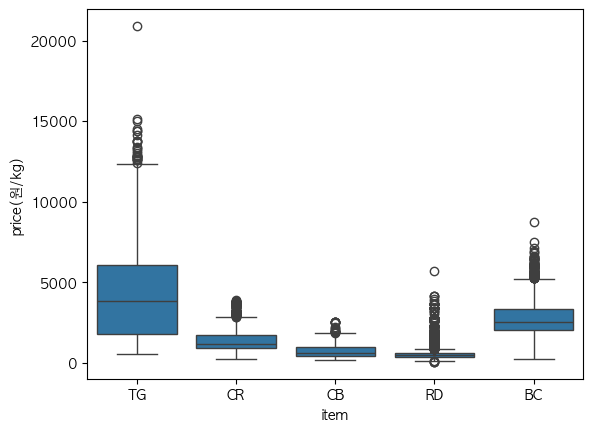

In [91]:
sns.boxplot(x='item', y='price(원/kg)', data=df_nonzero)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='item', ylabel='supply(kg)'>

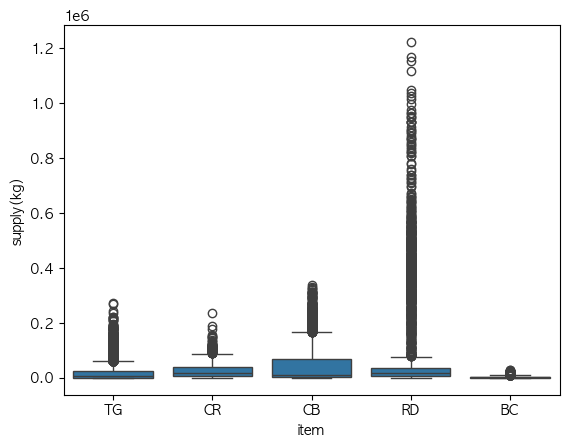

In [92]:
sns.boxplot(x='item', y='supply(kg)', data=df_nonzero)

In [93]:
# rd_supply_data_timestamp = rd_supply_data['supply(kg)']

# rd_supply_data_timestamp.hist(bins=10, color="skyblue")
# # plt.xticks(rotation=45)


In [94]:
# rd_supply_data = df[(df['item']=='RD') & (df['supply(kg)'] != 0)]
# plt.figure(figsize=(10,6))
# sns.scatterplot(x='timestamp', y='price(원/kg)', data=rd_supply_data)
# plt.title("무(RD)의 날짜별 Price 추이")
# plt.xlabel("날짜")
# plt.ylabel("price(원/kg)")
# plt.show()

# # 2022-07~2023-01 사이 가격 이상함

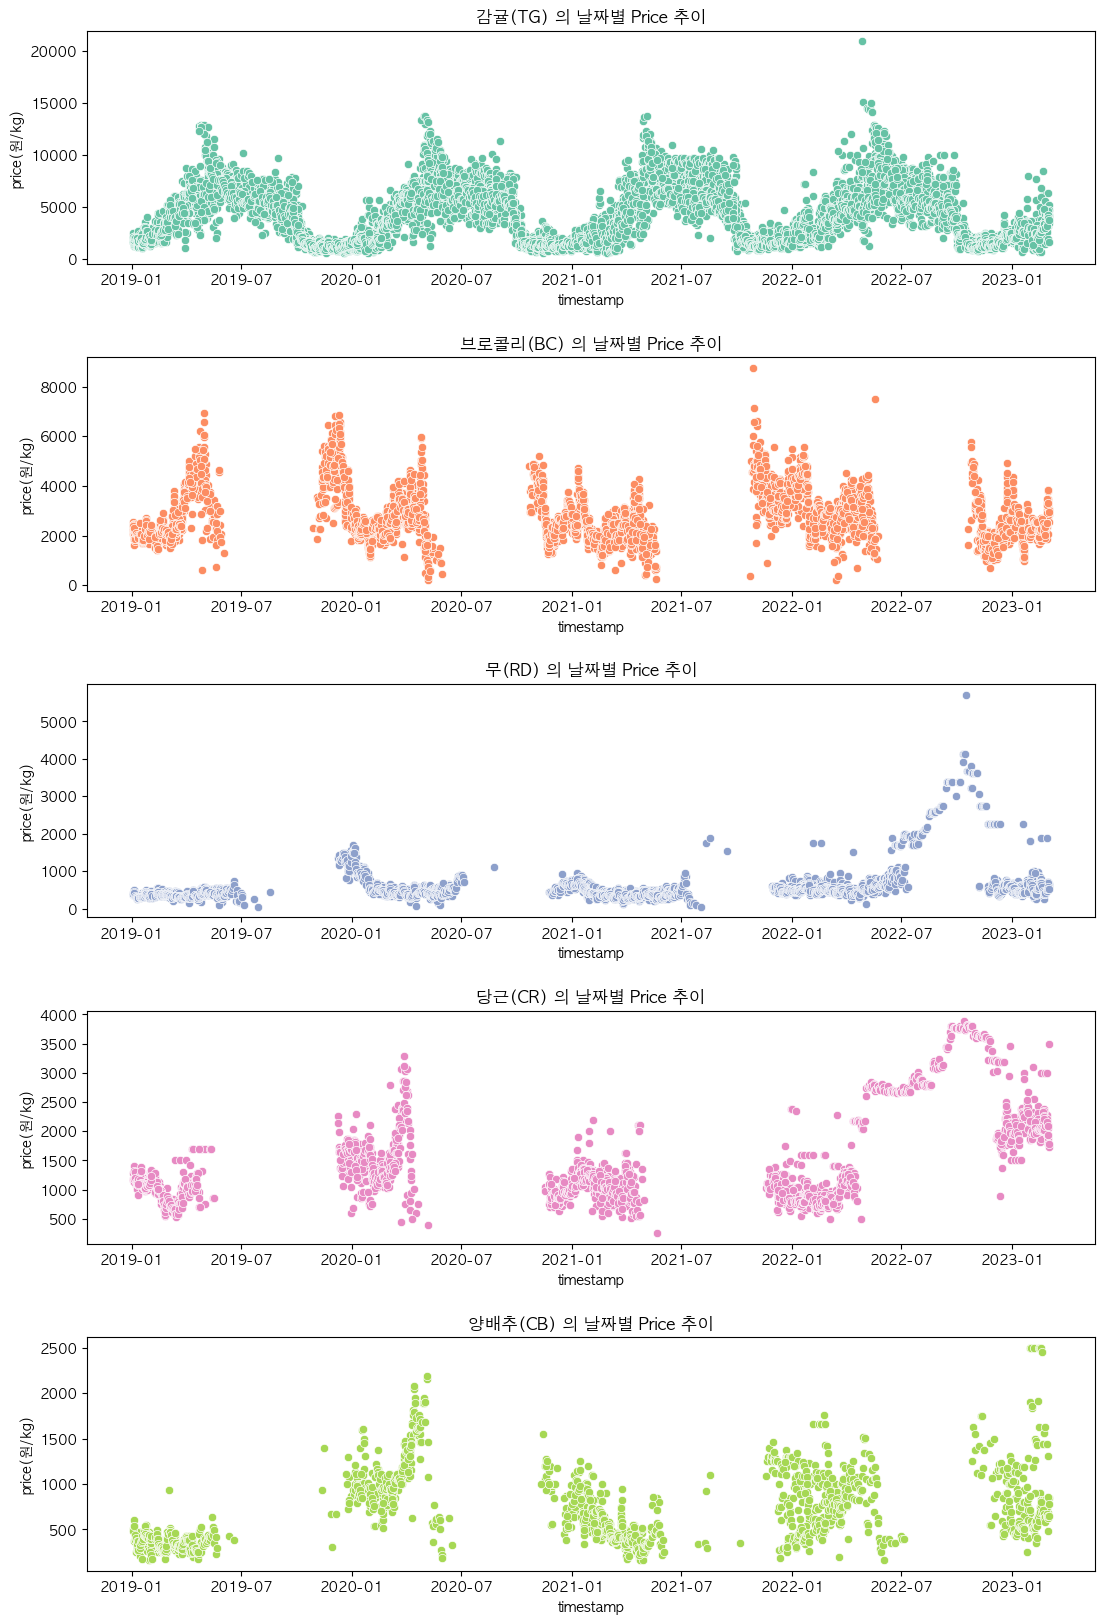

In [95]:
items = df_nonzero['item'].value_counts().index.to_list()
items_kr = ['감귤', '브로콜리', '무', '당근', '양배추']

fig = plt.figure(figsize=(13,20))
fig.subplots_adjust(hspace=0.4)
palette = sns.color_palette("Set2", n_colors=len(items))

for i in range(len(items)):
    plt.subplot(5,1,i+1)
    sns.scatterplot(x='timestamp', y='price(원/kg)', data=df_nonzero[df_nonzero['item']==items[i]], color=palette[i])
    plt.title(f"{items_kr[i]}({items[i]}) 의 날짜별 Price 추이")

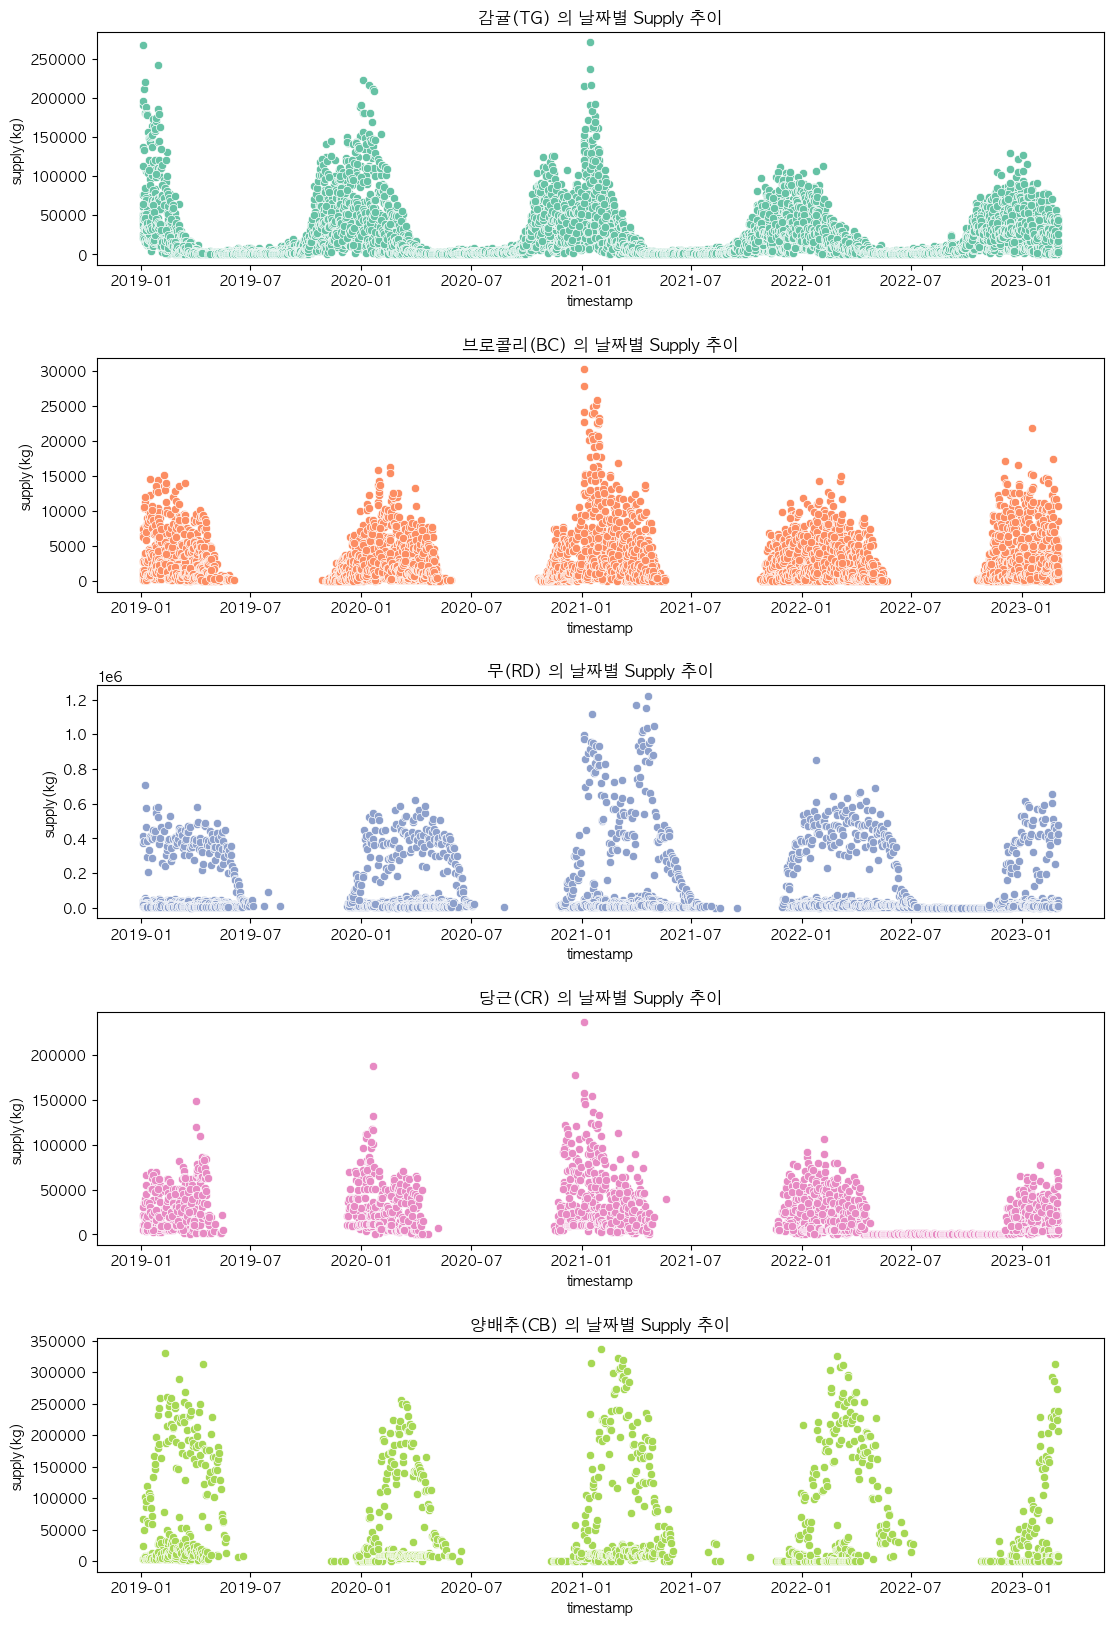

In [96]:
items = df_nonzero['item'].value_counts().index.to_list()

fig = plt.figure(figsize=(13,20))
fig.subplots_adjust(hspace=0.4)
palette = sns.color_palette("Set2", n_colors=len(items))

for i in range(len(items)):
    plt.subplot(5,1,i+1)
    sns.scatterplot(x='timestamp', y='supply(kg)', data=df_nonzero[df_nonzero['item']==items[i]], color=palette[i])
    plt.title(f"{items_kr[i]}({items[i]}) 의 날짜별 Supply 추이")

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2281/606823129.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='timestamp', y='price(원/kg)', data=df_nonzero[df_nonzero['item']==items[i]], palette='Set2', ax=ax1)
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2281/606823129.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='timestamp', y='supply(kg)', data=df_nonzero[df_nonzero['item']==items[i]], palette='Set1', ax=ax2)
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2281/606823129.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='timestamp', y='price(원/kg)', data=df_nonzero[df_nonzero['item']==items[i]], palette='Set2', ax=ax1)
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2281/606823129.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.

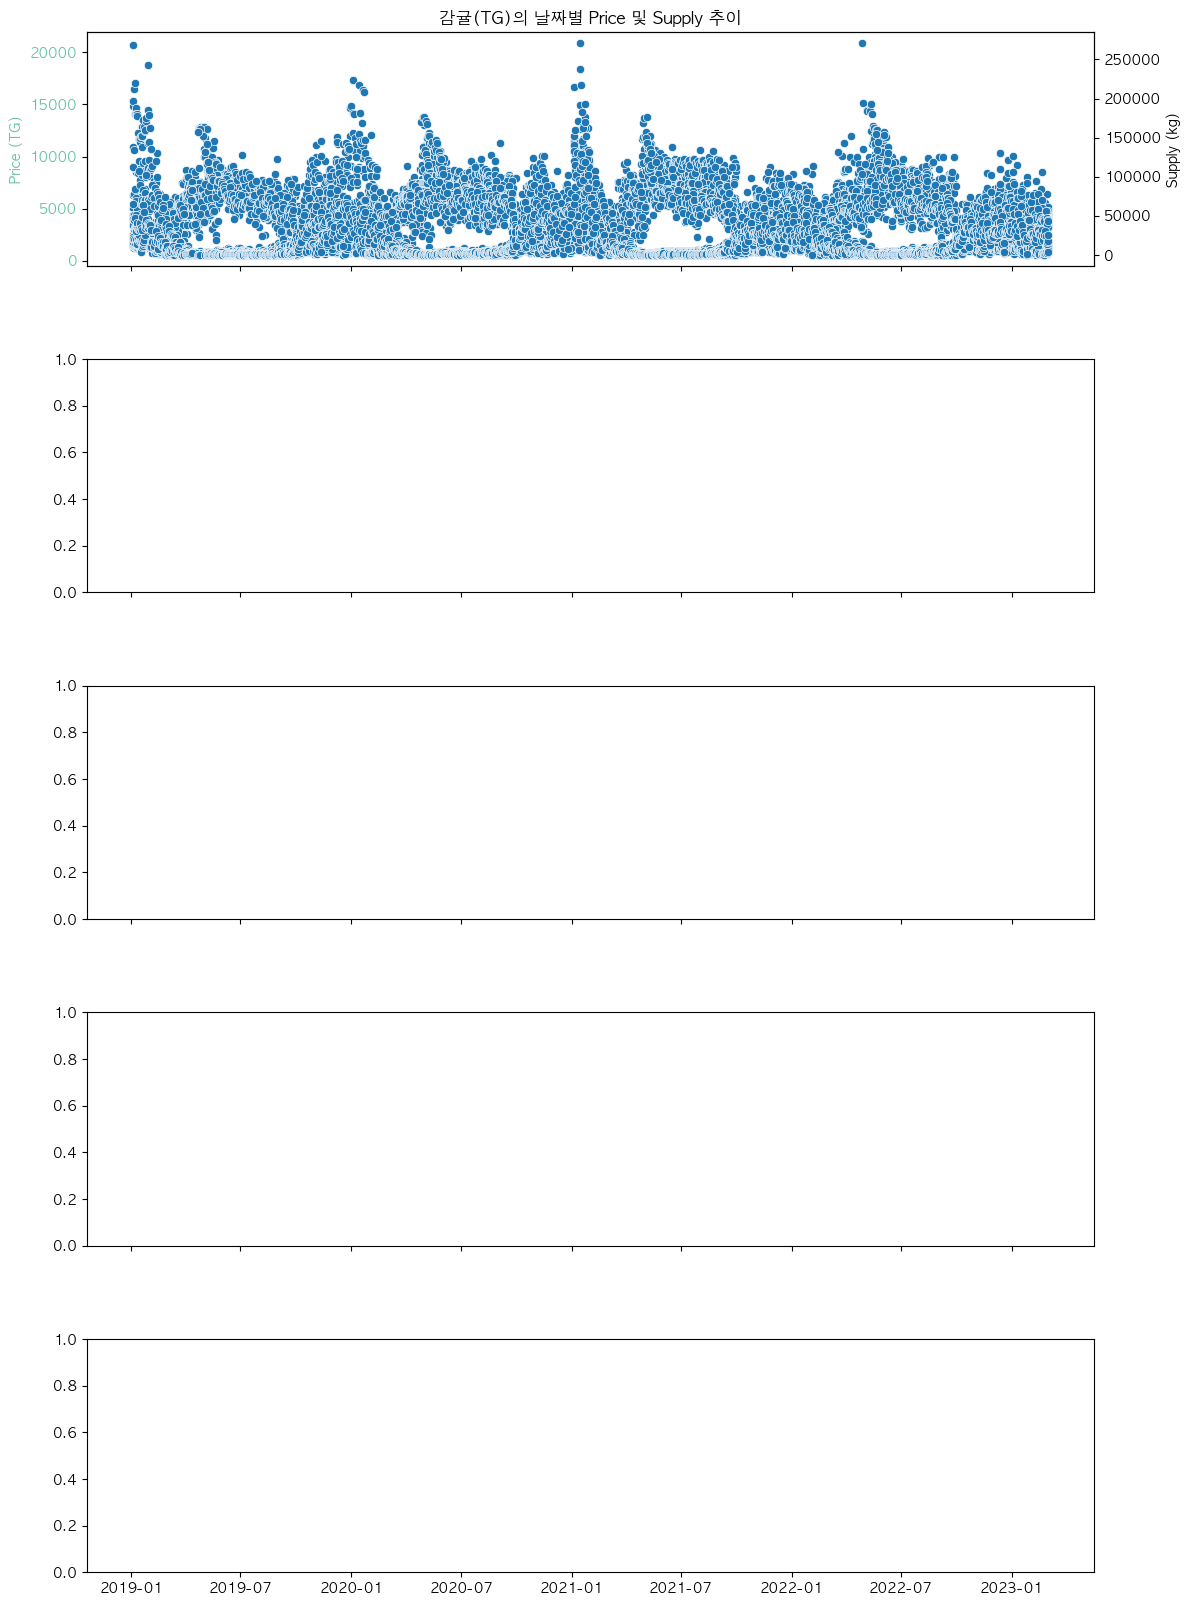

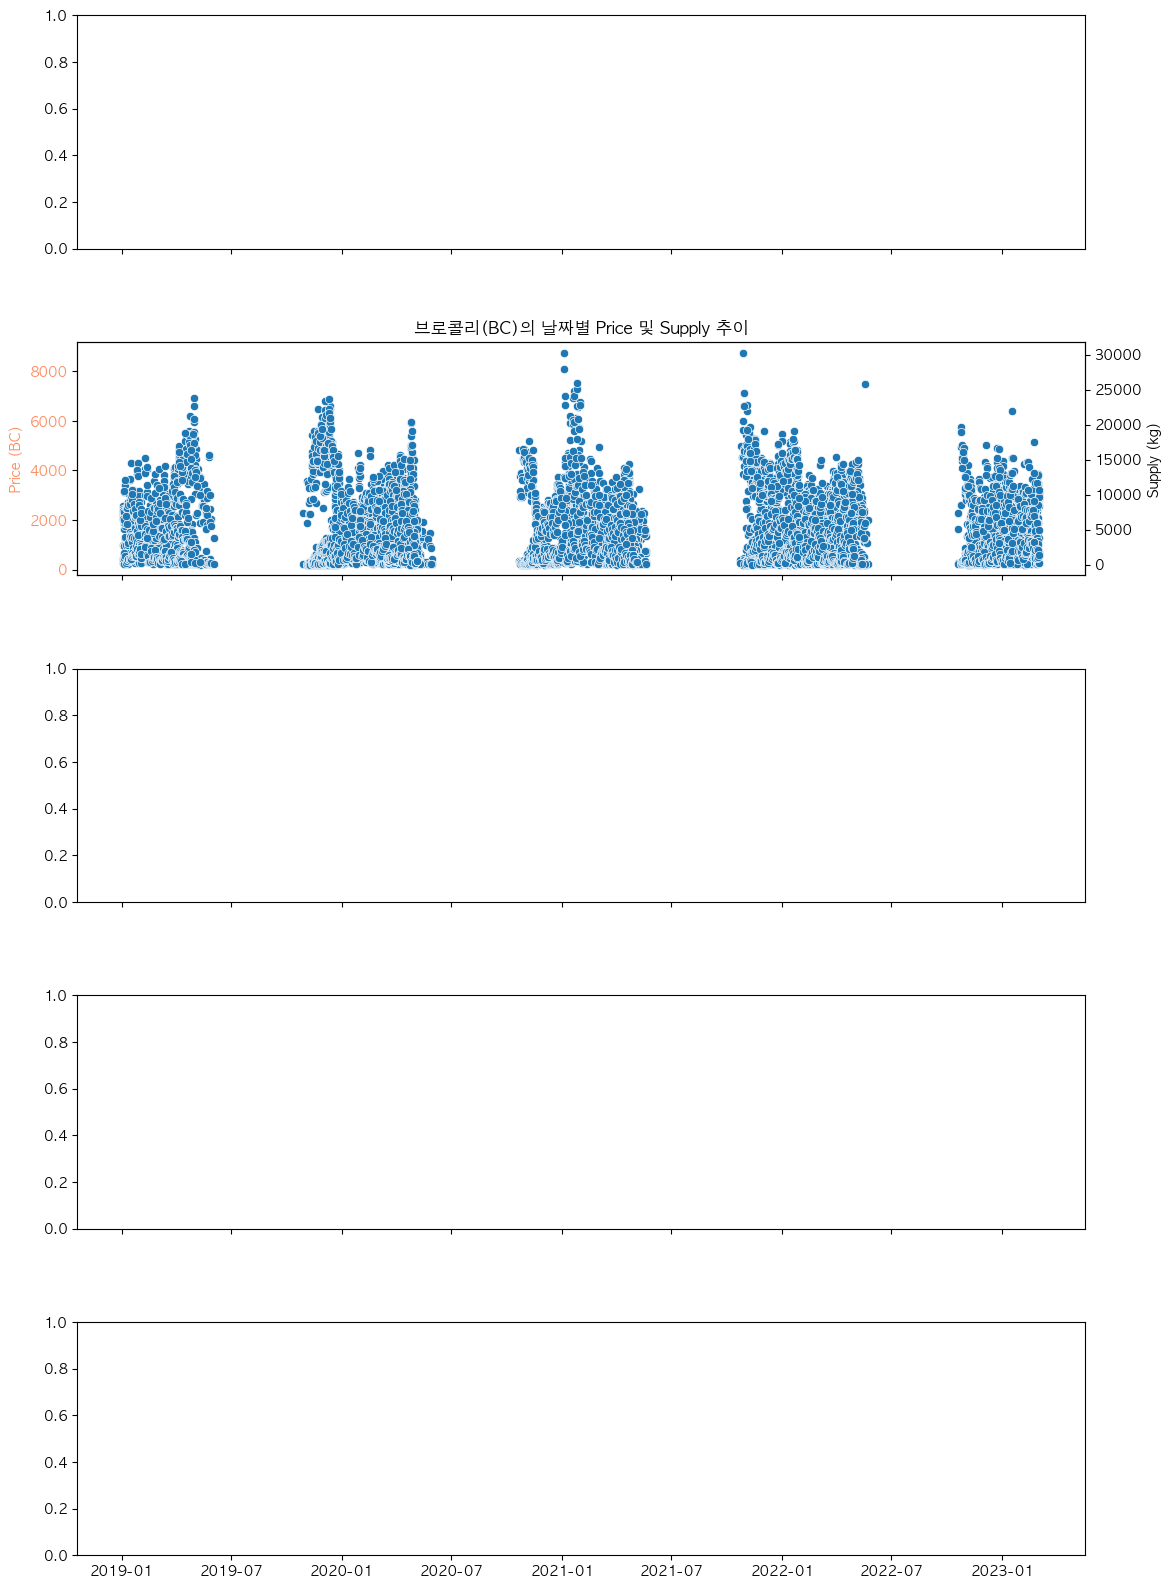

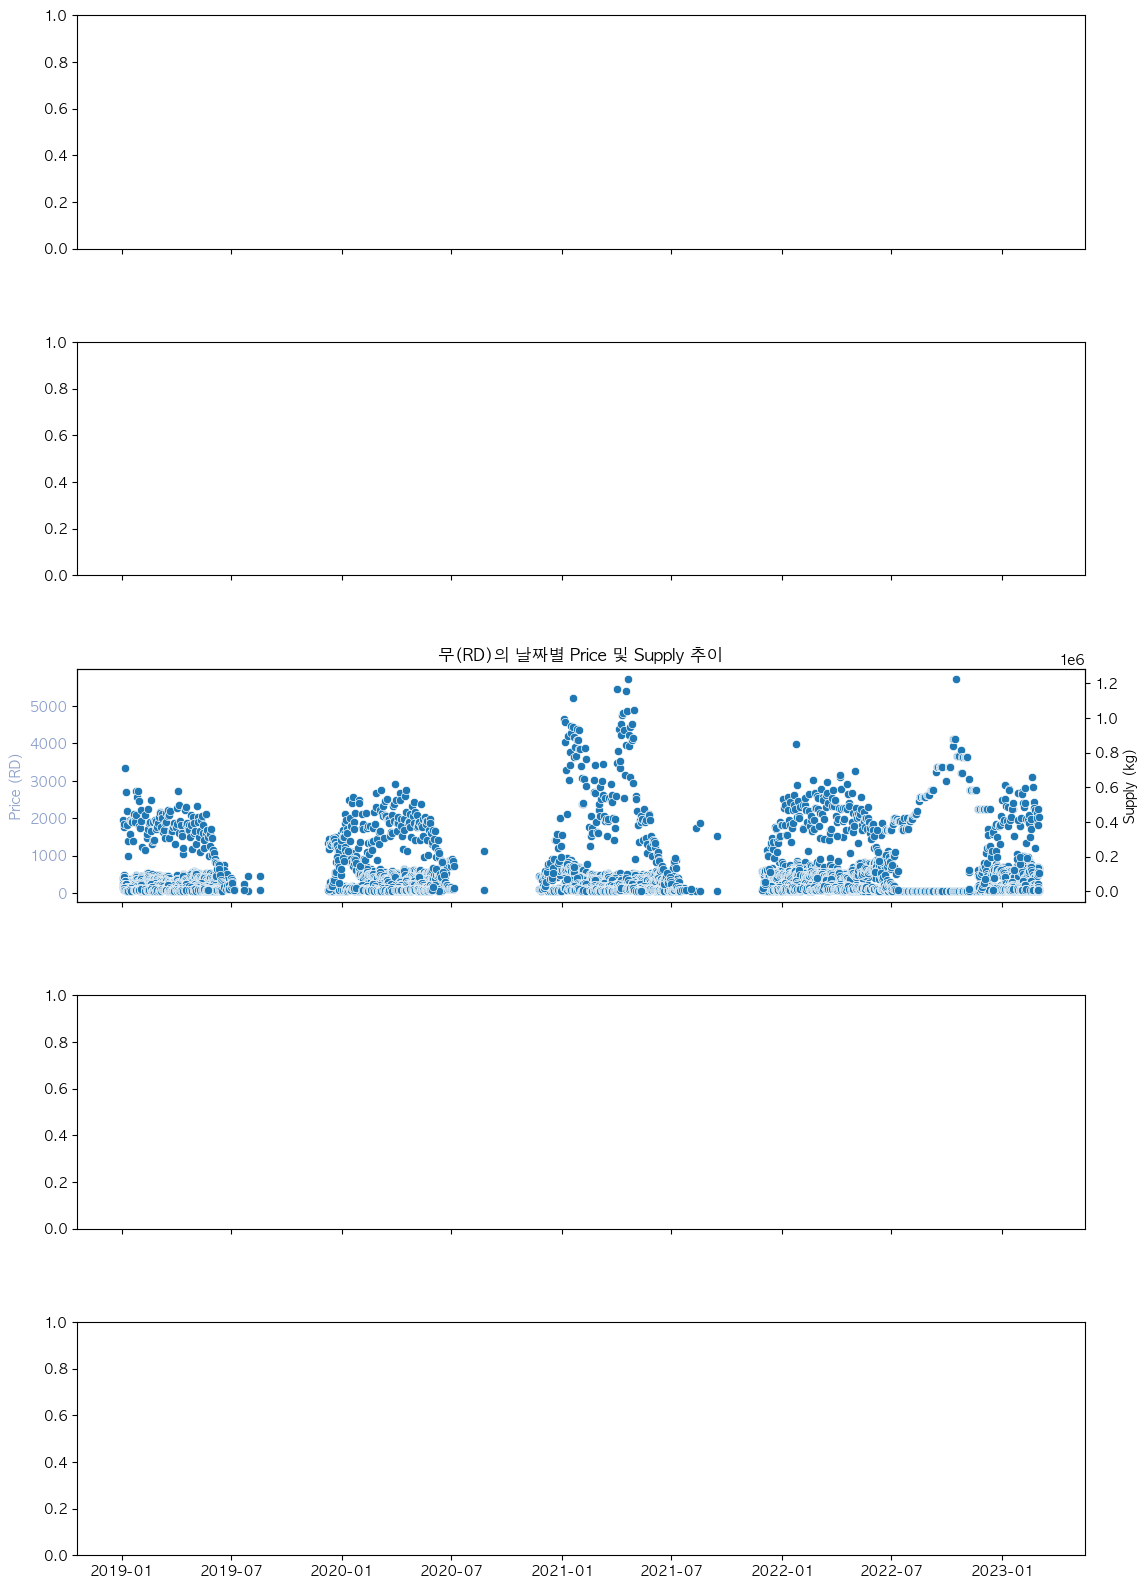

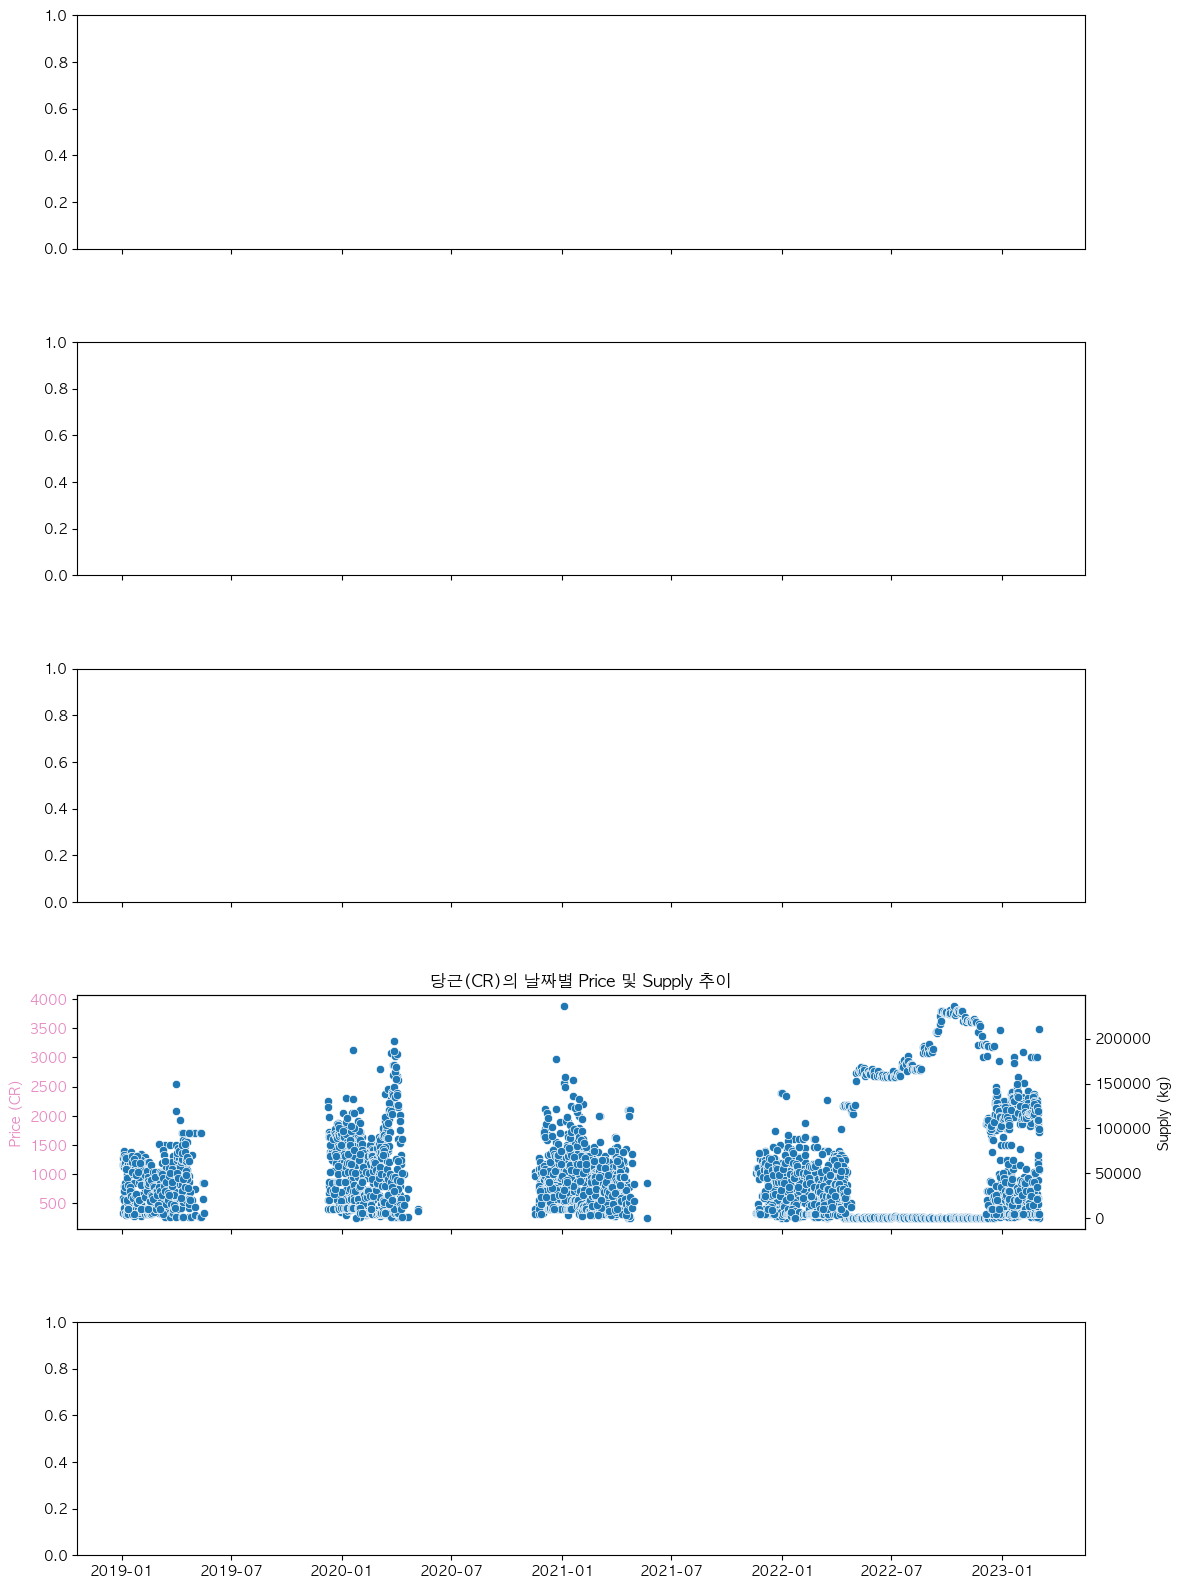

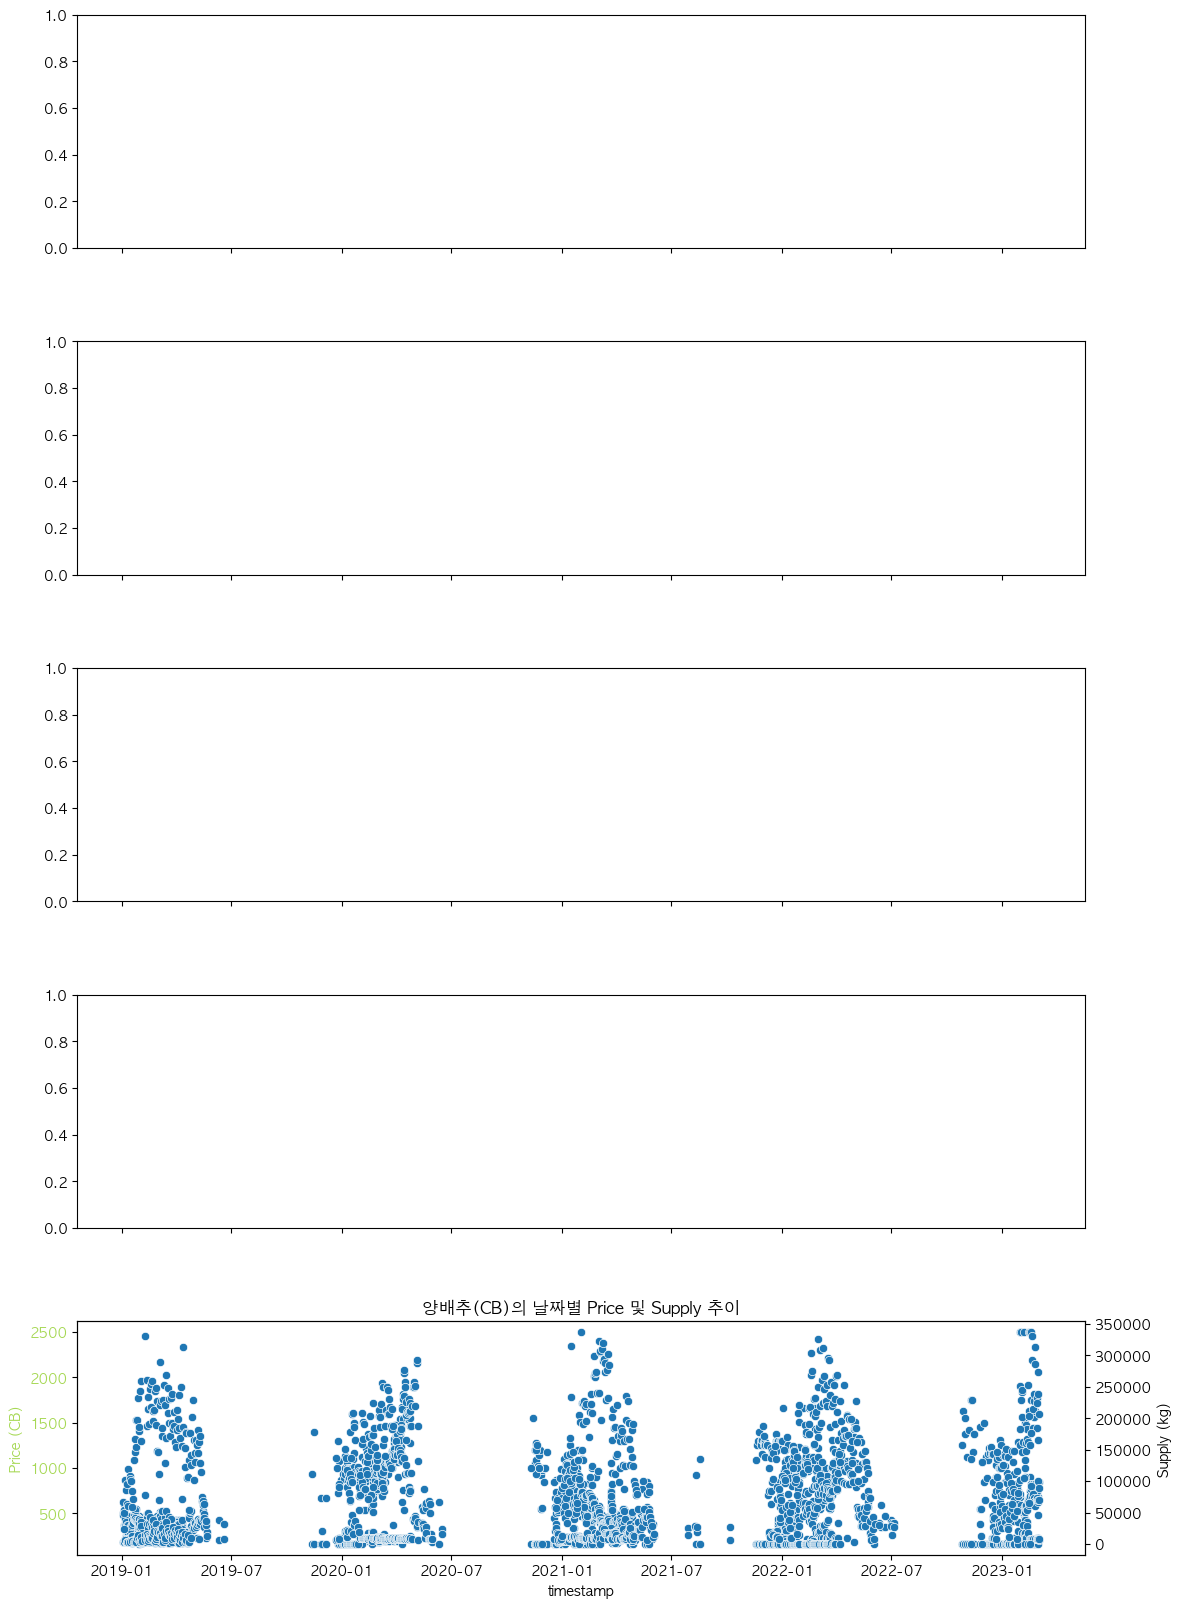

In [97]:

# palette = sns.color_palette("Set2", n_colors=len(items))
# color=palette[i]
for i in range(len(items)):
    fig, axes = plt.subplots(len(items), 1, figsize=(13, 20), sharex=True)
    fig.subplots_adjust(hspace=0.4)
    ax1 = axes[i]
    ax2 = ax1.twinx()
    

    # Price 그래프
    sns.scatterplot(x='timestamp', y='price(원/kg)', data=df_nonzero[df_nonzero['item']==items[i]], palette='Set2', ax=ax1)
    ax1.set_ylabel(f"Price ({items[i]})", color=palette[i])
    ax1.tick_params(axis='y', labelcolor=palette[i])
    ax1.set_title(f"{items_kr[i]}({items[i]})의 날짜별 Price 및 Supply 추이")

    # Supply 그래프
    sns.scatterplot(x='timestamp', y='supply(kg)', data=df_nonzero[df_nonzero['item']==items[i]], palette='Set1', ax=ax2)
    ax2.set_ylabel("Supply (kg)")
    ax2.tick_params(axis='y', labelcolor='black')

plt.show()

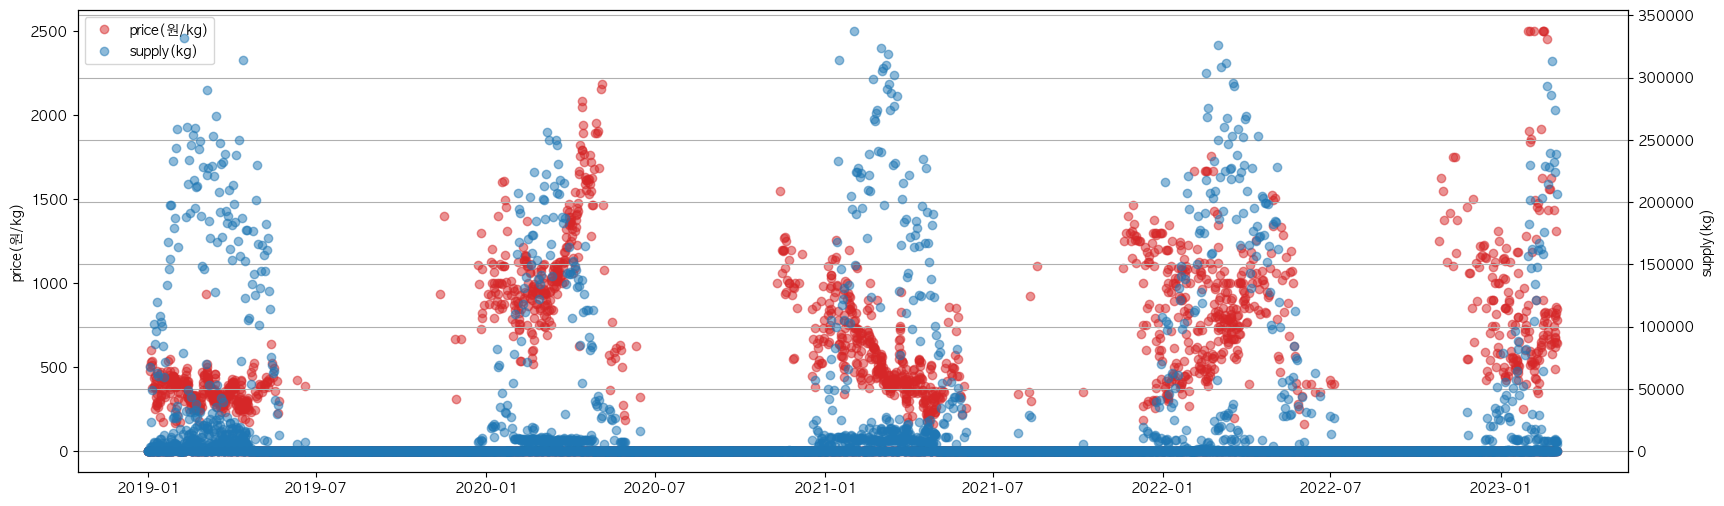

In [140]:
fig, ax = plt.subplots(figsize=(20, 6))  # Create a figure containing a single axes.

ax.plot(df[df['item']== 'CB']['timestamp'], df[df['item']== 'CB']['price(원/kg)'], marker='o', label='price(원/kg)', color = 'tab:red', alpha=0.5, linestyle='None')  # alpha 를 이용해 투명도 조절 가능.
ax.set_ylabel('price(원/kg)')

# Create a second y-axis
ax2 = ax.twinx()
ax2.plot(df[df['item']=='CB']['timestamp'], df[df['item']== 'CB']['supply(kg)'], marker='o', label='supply(kg)', color='tab:blue', alpha=0.5, linestyle='None')
ax2.set_ylabel('supply(kg)')


# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')  # legend의 위치가 적절하지 않다면 'upper left' 대신 'lower right' 등 다양하게 설정 가능.

plt.grid(True)
plt.show()# 그래프를 표시합니다.

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2281/1370802692.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='item', data=df_nonzero, palette='Blues_d')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.

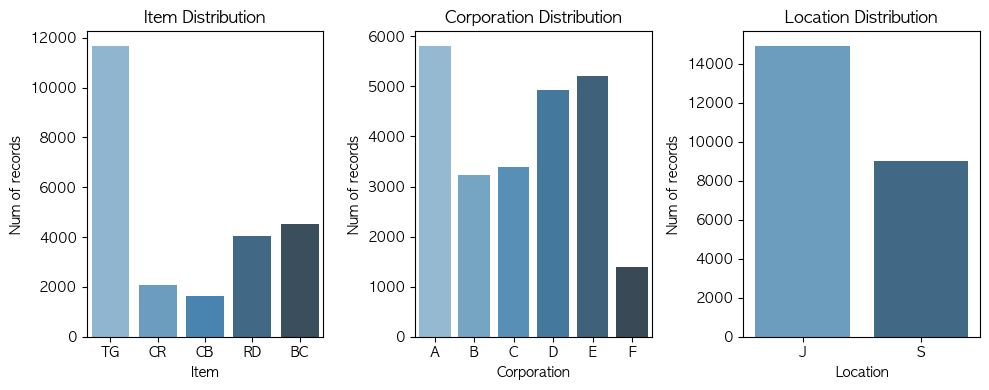

In [99]:
fig = plt.figure(figsize=(10, 4))
plt.subplot(1, 3,  1)
sns.countplot(x='item', data=df_nonzero, palette='Blues_d')
plt.title('Item Distribution')
plt.xlabel('Item')
plt.ylabel('Num of records')

plt.subplot(1, 3,  2)
sns.countplot(x='corporation', data=df_nonzero , palette='Blues_d')
plt.title('Corporation Distribution')
plt.xlabel('Corporation')
plt.ylabel('Num of records')

plt.subplot(1, 3,  3)
sns.countplot(x='location', data=df_nonzero, palette='Blues_d')
plt.title('Location Distribution')
plt.xlabel('Location')
plt.ylabel('Num of records')

plt.tight_layout()
plt.show()

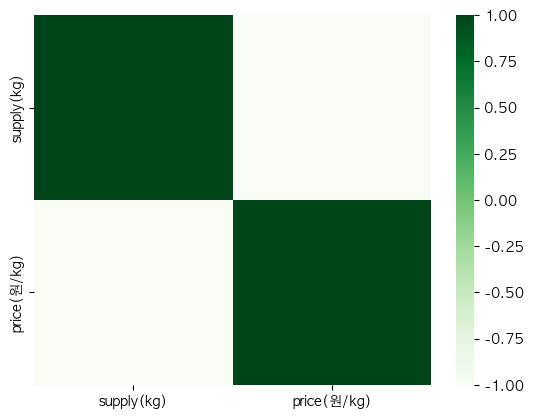

In [100]:
numeric_columns = df_nonzero.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_nonzero[numeric_columns].corr()

sns.heatmap(correlation_matrix.corr(), cmap='Greens')
plt.show()

In [101]:
# # 무의 연도별 price, 
# fig, axes = plt.subplots(1,2, figsize=(18,6))
# fig.suptitle('무(RD)의 연도/월별 가격 평균')
# # sns.barplot(data=rd_supply_data, x='year', y='price(원/kg)',ax=axes[0], palette="Set2")
# sns.barplot(data=rd_supply_data, x='month', y='price(원/kg)',ax=axes[1], palette="Set2")

In [102]:
# rd_supply_data.groupby('year')['price(원/kg)'].mean()

In [103]:
# # items = df_nonzero['item'].value_counts().index.to_list()

# # fig = plt.figure(figsize=(13,20))
# # fig.subplots_adjust(hspace=0.4)
# # palette = sns.color_palette("Set2", n_colors=len(items))

# # for i in range(len(items)):
# #     plt.subplot(5,1,i+1)
# #     sns.scatterplot(x='timestamp', y='supply(kg)', data=df_nonzero[df_nonzero['item']==items[i]], color=palette[i])
# #     plt.title(f"{items[i]} 의 날짜별 Supply 추이")
    
    

# fig, axes = plt.subplots(5,2, figsize=(18,6))
# for i in range(len(items)):
#     plt.subplot(5,2,i+1)
#     plt.title(f'{items[i]}의 연도/월별 가격 평균')
#     sns.barplot(data=df_nonzero[df_nonzero['item']==items[i]], x='year', y='price(원/kg)',ax=axes[i,i+1], palette="Set2")
#     sns.barplot(data=df_nonzero[df_nonzero['item']==items[i]], x='month', y='price(원/kg)',ax=axes[i,i+1], palette="Set2")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_su

<Axes: xlabel='month', ylabel='price(원/kg)'>

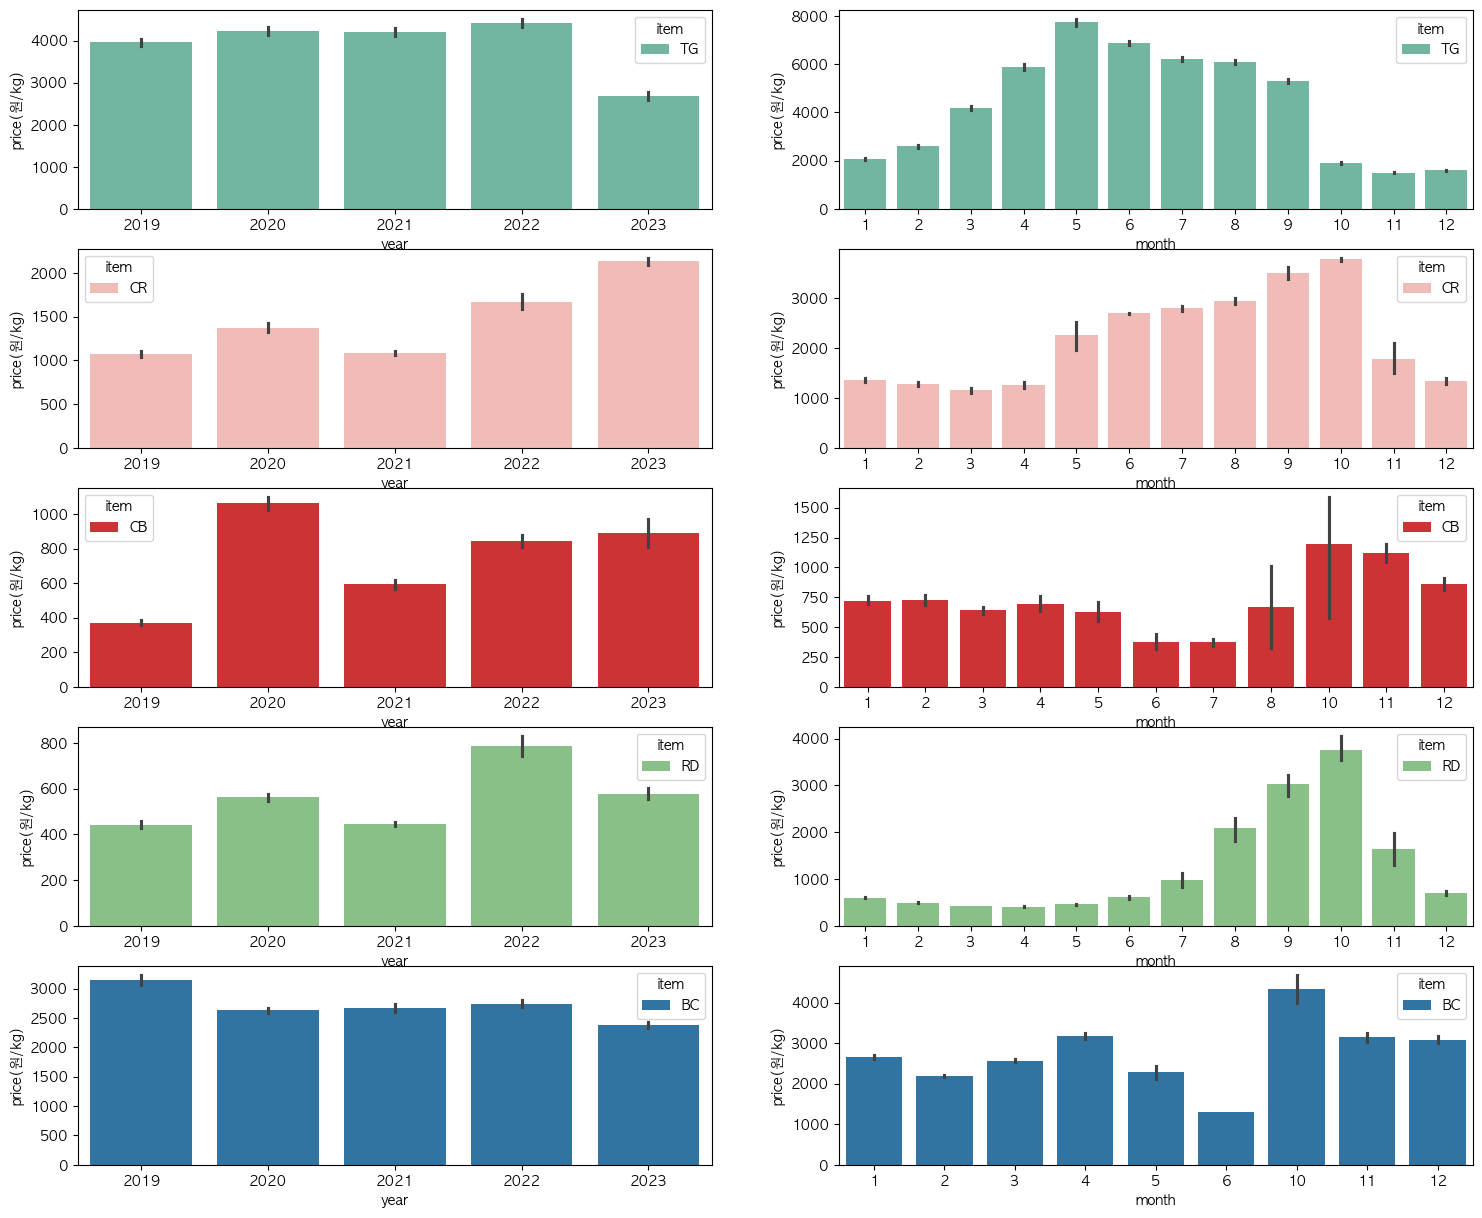

In [104]:
fig = plt.figure(figsize=(18,15))
# palette = sns.color_palette("Set2")
plt.subplot(5,2,1)
sns.barplot(data=df_nonzero[df_nonzero['item']=='TG'], x='year', y='price(원/kg)', palette='Set2', hue='item')
# plt.suptitle("TG")
plt.subplot(5,2,2)
sns.barplot(data=df_nonzero[df_nonzero['item']=='TG'], x='month', y='price(원/kg)', palette='Set2', hue='item')
plt.subplot(5,2,3)
sns.barplot(data=df_nonzero[df_nonzero['item']=='CR'], x='year', y='price(원/kg)', palette="Pastel1", hue='item')
plt.subplot(5,2,4)
sns.barplot(data=df_nonzero[df_nonzero['item']=='CR'], x='month', y='price(원/kg)', palette="Pastel1", hue='item')
plt.subplot(5,2,5)
sns.barplot(data=df_nonzero[df_nonzero['item']=='CB'], x='year', y='price(원/kg)', palette="Set1", hue='item')
plt.subplot(5,2,6)
sns.barplot(data=df_nonzero[df_nonzero['item']=='CB'], x='month', y='price(원/kg)', palette="Set1", hue='item')
plt.subplot(5,2,7)
sns.barplot(data=df_nonzero[df_nonzero['item']=='RD'], x='year', y='price(원/kg)', palette="Accent", hue='item')
plt.subplot(5,2,8)
sns.barplot(data=df_nonzero[df_nonzero['item']=='RD'], x='month', y='price(원/kg)', palette="Accent", hue='item')
plt.subplot(5,2,9)
sns.barplot(data=df_nonzero[df_nonzero['item']=='BC'], x='year', y='price(원/kg)', palette="tab10", hue='item')
plt.subplot(5,2,10)
sns.barplot(data=df_nonzero[df_nonzero['item']=='BC'], x='month', y='price(원/kg)', palette="tab10", hue='item')

In [105]:
# sns.barplot(x='corporation', y='price(원/kg)', hue='year', data=rd_supply_data, palette='Set1')
# # plt.title("유통법인에 따른 무(RD) 가격")

In [106]:
# sns.barplot(x='location', y='price(원/kg)', hue='year', data=rd_supply_data, palette='Set1')
# plt.title("지역에 따른 무(RD) 가격")

In [107]:
items = df_nonzero['item'].value_counts().index.to_list()
items
items_kr = ['감귤', '브로콜리', '무', '당근', '양배추']

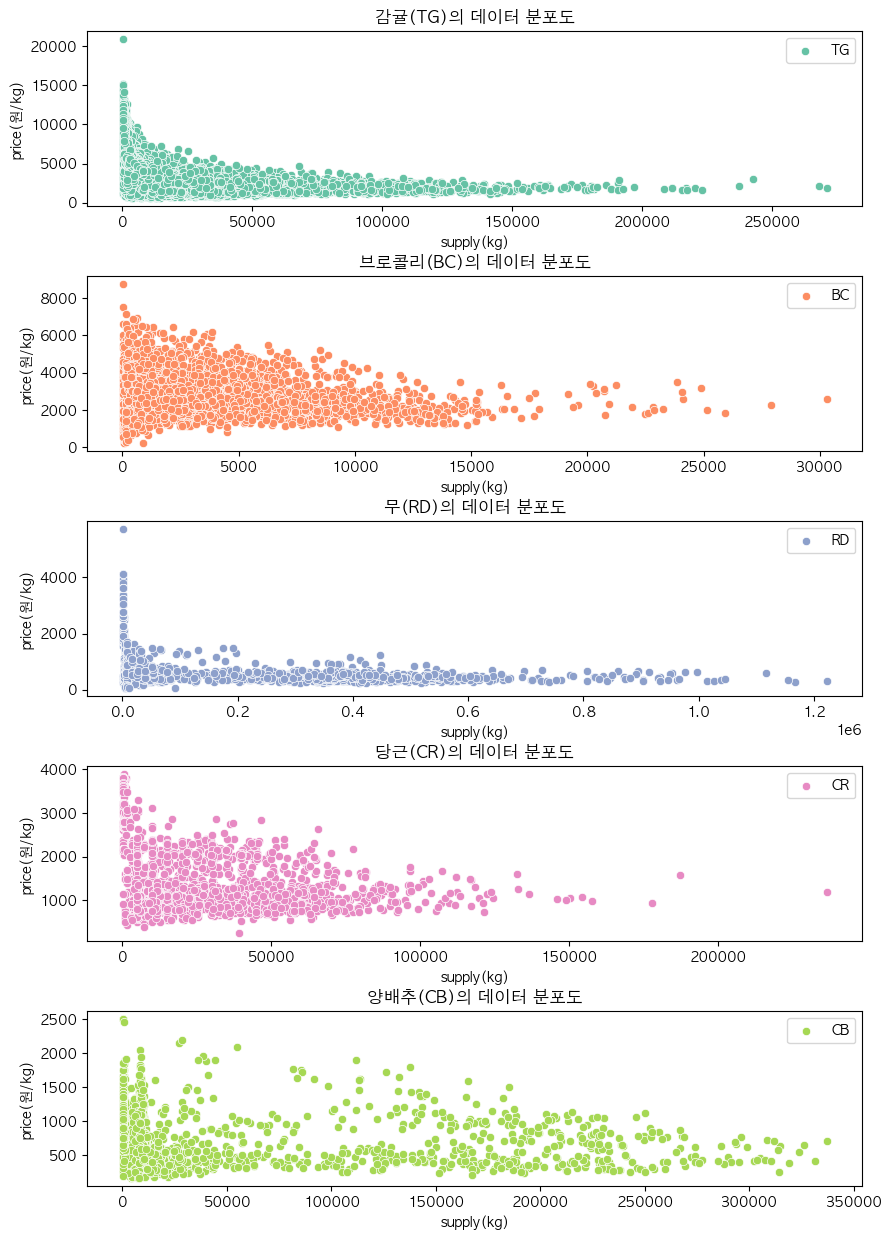

In [108]:
fig, axes = plt.subplots(5,1, figsize=(10,15))
fig.subplots_adjust(hspace=0.4)
palette = sns.color_palette("Set2", n_colors=len(items))
for i in range(len(items)):
    r = i % 5
    sns.scatterplot(data=df_nonzero[df_nonzero['item']==items[i]], x='supply(kg)', y='price(원/kg)', ax=axes[r], label=items[i], color=palette[i])
    axes[r].set_title(f"{items_kr[i]}({items[i]})의 데이터 분포도")


In [109]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, mean_absolute_error, make_scorer
import math # mse에 루트 씌우기 위해

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           59397 non-null  object        
 1   timestamp    59397 non-null  datetime64[ns]
 2   item         59397 non-null  object        
 3   corporation  59397 non-null  object        
 4   location     59397 non-null  object        
 5   supply(kg)   59397 non-null  float64       
 6   price(원/kg)  59397 non-null  float64       
 7   year         59397 non-null  int32         
 8   month        59397 non-null  int32         
 9   day          59397 non-null  int32         
 10  dayofweek    59397 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(4), object(4)
memory usage: 4.1+ MB


In [111]:
encoding_columns = ['item', 'corporation', 'location']
not_encoding_columns = ['ID', 'timestamp', 'supply(kg)', 'price(원/kg)', 'year', 'month', 'day', 'dayofweek']

In [112]:
# 범주형 데이터 변환

enc_classes = {}

def encoding_labels(x):
    le = LabelEncoder()
    label = le.fit_transform(x)
    enc_classes[x.name] = le.classes_
    return label

In [113]:
d1 = df[encoding_columns].apply(encoding_labels)
d1.head()

,item,corporation,location
0,4,0,0
1,4,0,0
2,4,0,0
3,4,0,0
4,4,0,0


In [114]:
# 각 범주형 변수의 인코딩 전 원래 값 확인
for col in encoding_columns:
    print(f"Original values for {col}: {enc_classes[col]}")


Original values for item: ['BC' 'CB' 'CR' 'RD' 'TG']
Original values for corporation: ['A' 'B' 'C' 'D' 'E' 'F']
Original values for location: ['J' 'S']


In [115]:
d2 = df[not_encoding_columns]
d2.head()

,ID,timestamp,supply(kg),price(원/kg),year,month,day,dayofweek
0,TG_A_J_20190101,2019-01-01,0.0,0.0,2019,1,1,1
1,TG_A_J_20190102,2019-01-02,0.0,0.0,2019,1,2,2
2,TG_A_J_20190103,2019-01-03,60601.0,1728.0,2019,1,3,3
3,TG_A_J_20190104,2019-01-04,25000.0,1408.0,2019,1,4,4
4,TG_A_J_20190105,2019-01-05,32352.0,1250.0,2019,1,5,5


In [116]:
data = d1.join(d2)
data.head()

,item,corporation,location,ID,timestamp,supply(kg),price(원/kg),year,month,day,dayofweek
0,4,0,0,TG_A_J_20190101,2019-01-01,0.0,0.0,2019,1,1,1
1,4,0,0,TG_A_J_20190102,2019-01-02,0.0,0.0,2019,1,2,2
2,4,0,0,TG_A_J_20190103,2019-01-03,60601.0,1728.0,2019,1,3,3
3,4,0,0,TG_A_J_20190104,2019-01-04,25000.0,1408.0,2019,1,4,4
4,4,0,0,TG_A_J_20190105,2019-01-05,32352.0,1250.0,2019,1,5,5


In [117]:
# 데이터셋 분할 

X = data.drop(columns=['supply(kg)','price(원/kg)','ID','timestamp'])
y = data['price(원/kg)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
X

,item,corporation,location,year,month,day,dayofweek
0,4,0,0,2019,1,1,1
1,4,0,0,2019,1,2,2
2,4,0,0,2019,1,3,3
3,4,0,0,2019,1,4,4
4,4,0,0,2019,1,5,5
...,...,...,...,...,...,...,...
59392,3,5,0,2023,2,27,0
59393,3,5,0,2023,2,28,1
59394,3,5,0,2023,3,1,2
59395,3,5,0,2023,3,2,3


In [119]:
## 의사결정 나무 

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train,y_train)
pred_dt_train = tree.predict(X_train)
pred_dt_test = tree.predict(X_test)
# acc_train = accuracy_score(y_train, pred_dt_train)
# acc_test = accuracy_score(y_test, pred_dt_test)
# f1_train = f1_score(y_train, pred_train)
# f1_test = f1_score(y_test, pred_test)
# print(f"accuracy : 학습: {acc_train}, 테스트: {acc_test}")
# print(f"f1 score : 학습: {f1_train}, 테스트: {f1_test}")

mse_train = mean_squared_error(y_train, pred_dt_train)
mse_test = mean_squared_error(y_test, pred_dt_test)

print(f"MSE 학습: {mse_train}, 테스트: {mse_test}")

mae_train = mean_absolute_error(y_train, pred_dt_train)
mae_test = mean_absolute_error(y_test, pred_dt_test)

print(f"MAE 학습: {mae_train}, 테스트: {mae_test}")

dt_rmse_train = np.sqrt(mean_squared_error(y_train, pred_dt_train))
dt_rmse_test = np.sqrt(mean_squared_error(y_test, pred_dt_test))
print(f"RMSE 학습: {dt_rmse_train}, 테스트: {dt_rmse_test}")

MSE 학습: 1778296.0602966312, 테스트: 1819637.2685495291
MAE 학습: 769.926858922127, 테스트: 781.2787135176648
RMSE 학습: 1333.5276751146305, 테스트: 1348.9393124042049


In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
## 랜덤포레스트 

rf_params = {'n_estimators':[100], 'max_features':[5]}
rf_model = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=5)
rf_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [122]:
pred_rf_train = rf_model.predict(X_train)
pred_rf_test = rf_model.predict(X_test)
rf_rmse_train = math.sqrt(mean_squared_error(y_train, pred_rf_train))
rf_rmse_test = math.sqrt(mean_squared_error(y_test, pred_rf_test))
print(f"RMSE 학습: {rf_rmse_train}, 테스트: {rf_rmse_test}")

rf_mae_train = mean_absolute_error(y_train, pred_rf_train)
rf_mae_test = mean_absolute_error(y_test, pred_rf_test)
print(f"MAE 학습: {rf_mae_train}, 테스트: {rf_mae_test}")

RMSE 학습: 324.0634507189828, 테스트: 873.8543042381582
MAE 학습: 114.42385333237128, 테스트: 314.6882615039281


In [123]:
# lightGBM

import lightgbm as lgb

In [124]:
lgb_clf = lgb.LGBMRegressor(num_leaves=31, objective='regression')
lgb_clf.fit(X_train, y_train)
pred_lgb_train = lgb_clf.predict(X_train)
pred_lgb_test = lgb_clf.predict(X_test)

lgb_mae_train = mean_absolute_error(y_train, pred_lgb_train)
lgb_mae_test = mean_absolute_error(y_test, pred_lgb_test)
print(f"MAE 학습: {lgb_mae_train}, 테스트: {lgb_mae_test}")

lgb_rmse_train = np.sqrt(mean_squared_error(y_train, pred_lgb_train))
lgb_rmse_test = np.sqrt(mean_squared_error(y_test, pred_lgb_test))
print(f"RMSE 학습: {lgb_rmse_train}, 테스트: {lgb_rmse_test}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 71
[LightGBM] [Info] Number of data points in the train set: 41577, number of used features: 7
[LightGBM] [Info] Start training from score 1128.593886
MAE 학습: 392.9199701614463, 테스트: 419.7909814320361
RMSE 학습: 848.5475471544092, 테스트: 918.6714055166576


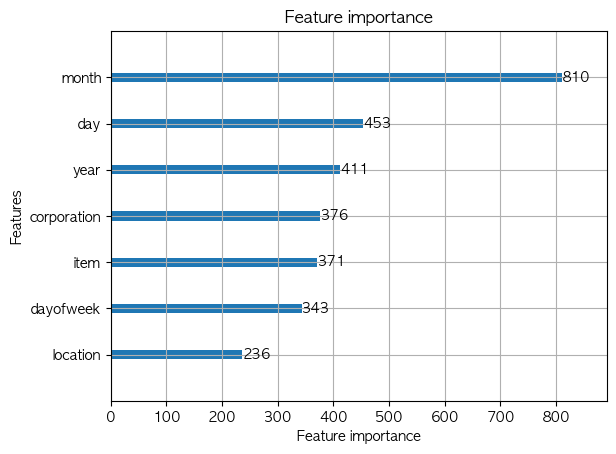

In [125]:
lgb.plot_importance(lgb_clf, max_num_features=10, importance_type='split')
plt.show()

<Axes: xlabel='None', ylabel='None'>

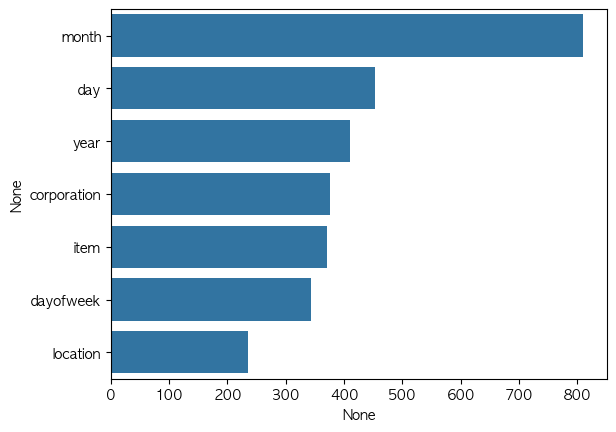

In [126]:
feature_series = pd.Series(data=lgb_clf.feature_importances_, index=X.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

In [127]:
# result_df = X_test.copy()
# result_df['예측 가격'] = pred_lgb_test

# result_df['timestamp'] = pd.to_datetime(result_df['timestamp_column_name'])

# plt.figure(figsize=(12,6))
# plt.plot(result_df['timestamp'], result_df['price(원/kg)'], label='Actual Price', marker='o')
# plt.plot(result_df['timestamp'], result_df['predicted_price'], label='Predicted Price', marker='x')
# plt.title('Actual vs Predicted Prices Over Time')
# plt.xlabel('Timestamp')
# plt.ylabel('Price(원/kg)')
# plt.legend()
# plt.show()

In [128]:
# catboost 

import catboost as cb
from catboost import CatBoostRegressor


In [129]:
cat_model = cb.CatBoostRegressor(iterations=100, depth=10, learning_rate=0.05)
cat_model.fit(X_train, y_train)

pred_cb_train = cat_model.predict(X_train)
pred_cb_test = cat_model.predict(X_test)

cb_mae_train = mean_absolute_error(y_train, pred_cb_train)
cb_mae_test = mean_absolute_error(y_test, pred_cb_test)
print(f"MAE 학습: {cb_mae_train}, 테스트: {cb_mae_test}")

cb_rmse_train = np.sqrt(mean_squared_error(y_train, pred_cb_train))
cb_rmse_test = np.sqrt(mean_squared_error(y_test,pred_cb_test))
print(f"RMSE 학습: {cb_rmse_train}, 테스트: {cb_rmse_test}")

0:	learn: 1960.5982458	total: 60.8ms	remaining: 6.02s
1:	learn: 1890.9387277	total: 64.2ms	remaining: 3.14s
2:	learn: 1828.3087413	total: 67ms	remaining: 2.17s
3:	learn: 1771.0462251	total: 70.3ms	remaining: 1.69s
4:	learn: 1715.5324227	total: 73.2ms	remaining: 1.39s
5:	learn: 1662.8025132	total: 76.2ms	remaining: 1.19s
6:	learn: 1613.2180862	total: 79.1ms	remaining: 1.05s
7:	learn: 1570.2058933	total: 82.1ms	remaining: 944ms
8:	learn: 1527.8939625	total: 85.2ms	remaining: 861ms
9:	learn: 1486.9191481	total: 88.1ms	remaining: 793ms
10:	learn: 1451.7292673	total: 91ms	remaining: 737ms
11:	learn: 1417.2784357	total: 94ms	remaining: 689ms
12:	learn: 1383.0141079	total: 97ms	remaining: 649ms
13:	learn: 1353.4908174	total: 100ms	remaining: 615ms
14:	learn: 1324.7114285	total: 103ms	remaining: 584ms
15:	learn: 1301.5425242	total: 105ms	remaining: 552ms
16:	learn: 1277.6029804	total: 108ms	remaining: 527ms
17:	learn: 1255.3498466	total: 111ms	remaining: 505ms
18:	learn: 1234.2416332	total: 11

In [130]:
# cb.plot_importance(cat_model, max_num_features=10, importance_type='split')
# plt.show()

# get_feature_importance(data=)

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_2281/2543977072.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Test_RMSE', data=df_recap, palette='Blues_d')
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subse

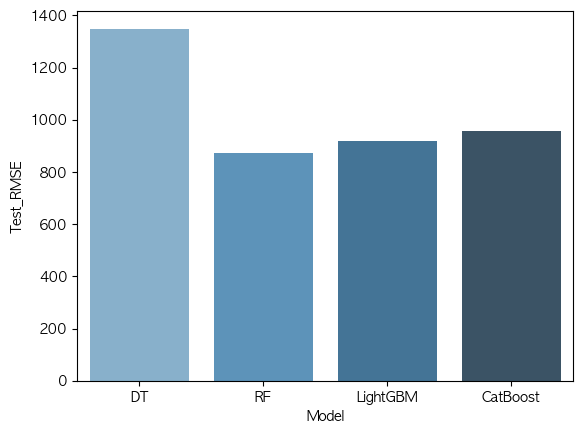

In [131]:
rmse_test = [dt_rmse_test, rf_rmse_test, lgb_rmse_test, cb_rmse_test]
recap_model = ["DT", "RF", "LightGBM", "CatBoost"]
df_recap = pd.DataFrame({'Model':recap_model, 'Test_RMSE':rmse_test})
ax = sns.barplot(x='Model', y='Test_RMSE', data=df_recap, palette='Blues_d')

In [132]:
import shap
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

In [133]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[1,:],
                X_test.iloc[1,:])

# 빨간색이 영향도가 높은 것, 파란색이 영향도가 낮음.

In [134]:
# top_k_features = 5

# selected_shap_values = shap_values[:, :top_k_features]
# selected_X_test = X_test.iloc[:, :top_k_features]

# shap.force_plot(explainer.expected_value, selected_shap_values, selected_X_test)
# plt.show()

In [135]:
# shap.summary_plot(shap_values, X_test)

# item 변수의 값이 높을 수록 예상 가격이 높은 경향이 있음
# dayofweek 변수 값이 낮을 수록 예상 
# dayofweek 가 커질수록 가격이 낮아진다
# item 아이템 숫자가 커질수록 가격이 높아진다. 
# 모델 완성도가 높은다음에 shap에 대한 설명력이 높아짐. 

In [136]:
# 변수 간의 shap value 파악

# shap.dependence_plot("dayofweek", shap_values, X_test)

---뻘짓 여기까지---

In [137]:
plt.figure(figsize=(12,6))
plt.plot(X_test['timestamp'], y_test, label='Actual Price', marker='o', linestyle='', alpha=0.5)
plt.plot(y_test.index, pred_cb_test, label='Predicated Price', marker='x', linestyle='', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

KeyError: 'timestamp'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# 시각화 실패

# X_test['timestamp'] = df.loc[X_test.index, 'timestamp']
# y_test['timestamp'] = df.loc[y_test.index, 'timestamp']

# plt.figure(figsize=(12,6))
# plt.plot(X_test['timestamp'], y_test, label='Actual Price', marker='o', linestyle='', alpha=0.5)
# plt.plot(y_test['timestamp'], pred_cb_test, label='Predicated Price', marker='x', linestyle='', alpha=0.5)
# plt.xlabel('Index')
# plt.ylabel('Price')
# plt.legend()
# plt.show()


### test 데이터셋에 적용

In [ ]:
test_df.head()

,ID,timestamp,item,corporation,location,year,month,day,dayofweek
0,TG_A_J_20230304,2023-03-04,TG,A,J,2023,1,1,5
1,TG_A_J_20230305,2023-03-05,TG,A,J,2023,1,2,6
2,TG_A_J_20230306,2023-03-06,TG,A,J,2023,1,3,0
3,TG_A_J_20230307,2023-03-07,TG,A,J,2023,1,4,1
4,TG_A_J_20230308,2023-03-08,TG,A,J,2023,1,5,2


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           1092 non-null   object        
 1   timestamp    1092 non-null   datetime64[ns]
 2   item         1092 non-null   object        
 3   corporation  1092 non-null   object        
 4   location     1092 non-null   object        
 5   year         1092 non-null   int32         
 6   month        1092 non-null   int32         
 7   day          1092 non-null   int32         
 8   dayofweek    1092 non-null   int32         
dtypes: datetime64[ns](1), int32(4), object(4)
memory usage: 59.8+ KB


In [ ]:
encoding_columns = ['item', 'corporation', 'location'] 
not_encoding_columns = ['ID', 'timestamp', 'year', 'month', 'day', 'dayofweek']

In [ ]:
enc_classes = {}

def encoding_labels(x):
    le = LabelEncoder()
    label = le.fit_transform(x)
    enc_classes[x.name] = le.classes_
    return label

In [ ]:
d1 = test_df[encoding_columns].apply(encoding_labels)
d1.head()

,item,corporation,location
0,4,0,0
1,4,0,0
2,4,0,0
3,4,0,0
4,4,0,0


In [ ]:
print(le.classes_)

NameError: name 'le' is not defined

In [ ]:
d2 = test_df[not_encoding_columns]
d2

,ID,timestamp,year,month,day,dayofweek
0,TG_A_J_20230304,2023-03-04,2023,1,1,5
1,TG_A_J_20230305,2023-03-05,2023,1,2,6
2,TG_A_J_20230306,2023-03-06,2023,1,3,0
3,TG_A_J_20230307,2023-03-07,2023,1,4,1
4,TG_A_J_20230308,2023-03-08,2023,1,5,2
...,...,...,...,...,...,...
1087,RD_F_J_20230327,2023-03-27,2023,12,23,0
1088,RD_F_J_20230328,2023-03-28,2023,12,24,1
1089,RD_F_J_20230329,2023-03-29,2023,12,25,2
1090,RD_F_J_20230330,2023-03-30,2023,12,26,3


In [ ]:
test_data = d1.join(d2)
test_data.head()

,item,corporation,location,ID,timestamp,year,month,day,dayofweek
0,4,0,0,TG_A_J_20230304,2023-03-04,2023,1,1,5
1,4,0,0,TG_A_J_20230305,2023-03-05,2023,1,2,6
2,4,0,0,TG_A_J_20230306,2023-03-06,2023,1,3,0
3,4,0,0,TG_A_J_20230307,2023-03-07,2023,1,4,1
4,4,0,0,TG_A_J_20230308,2023-03-08,2023,1,5,2


In [ ]:
X_new = test_data.drop(['timestamp', 'ID'], axis=1)
test_predictions = rf_model.predict(X_new)
test_predictions = np.where(test_predictions<0, 0, test_predictions)

In [ ]:
result = pd.DataFrame({'ID':test_data['ID'], 'answer':test_predictions})
result.head()

,ID,answer
0,TG_A_J_20230304,19.78
1,TG_A_J_20230305,0.00
2,TG_A_J_20230306,2076.65
3,TG_A_J_20230307,1795.56
4,TG_A_J_20230308,1699.25


In [ ]:
select = df[(df['timestamp'] >= '2022-03-04') & (df['timestamp'] <= '2022-03-31')]
select.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day,dayofweek
1158,TG_A_J_20220304,2022-03-04,TG,A,J,3860.0,3313.0,2022,3,4,4
1159,TG_A_J_20220305,2022-03-05,TG,A,J,6662.0,4423.0,2022,3,5,5
1160,TG_A_J_20220306,2022-03-06,TG,A,J,0.0,0.0,2022,3,6,6
1161,TG_A_J_20220307,2022-03-07,TG,A,J,11181.0,3542.0,2022,3,7,0
1162,TG_A_J_20220308,2022-03-08,TG,A,J,7396.0,2644.0,2022,3,8,1


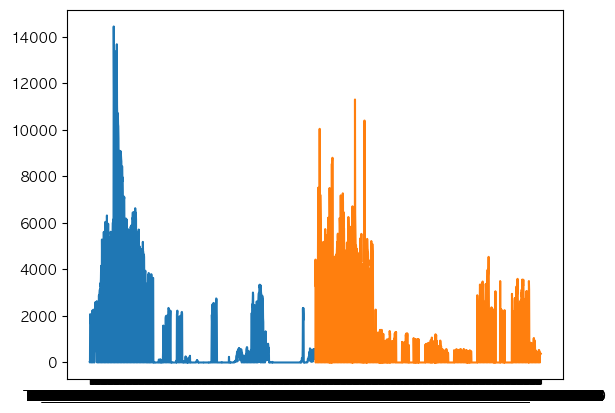

In [ ]:
plt.plot(result['ID'], result['answer'])
plt.plot(select['ID'], select['price(원/kg)'])

In [ ]:
# 9등 
# for i in items:
#     for j in train_data.corporation.unique():
#         for k in train_data.location.unique():
#             plt.figure(figsize=(10,3))
#             print('item : ',i,'corpolation : ',j,'location : ', k)            
#             train_data.loc[(train_data.item.isin(items)) & (train_data.corporation==j) & (train_data.location==k) & 
#                            ((train_data.month==3) | (train_data.month==2))].groupby(['month','day']).mean()['price'].plot()
#             plt.show()